In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directions = np.load('directions.npy')
responses = np.load('tuned_unit_responses.npy')

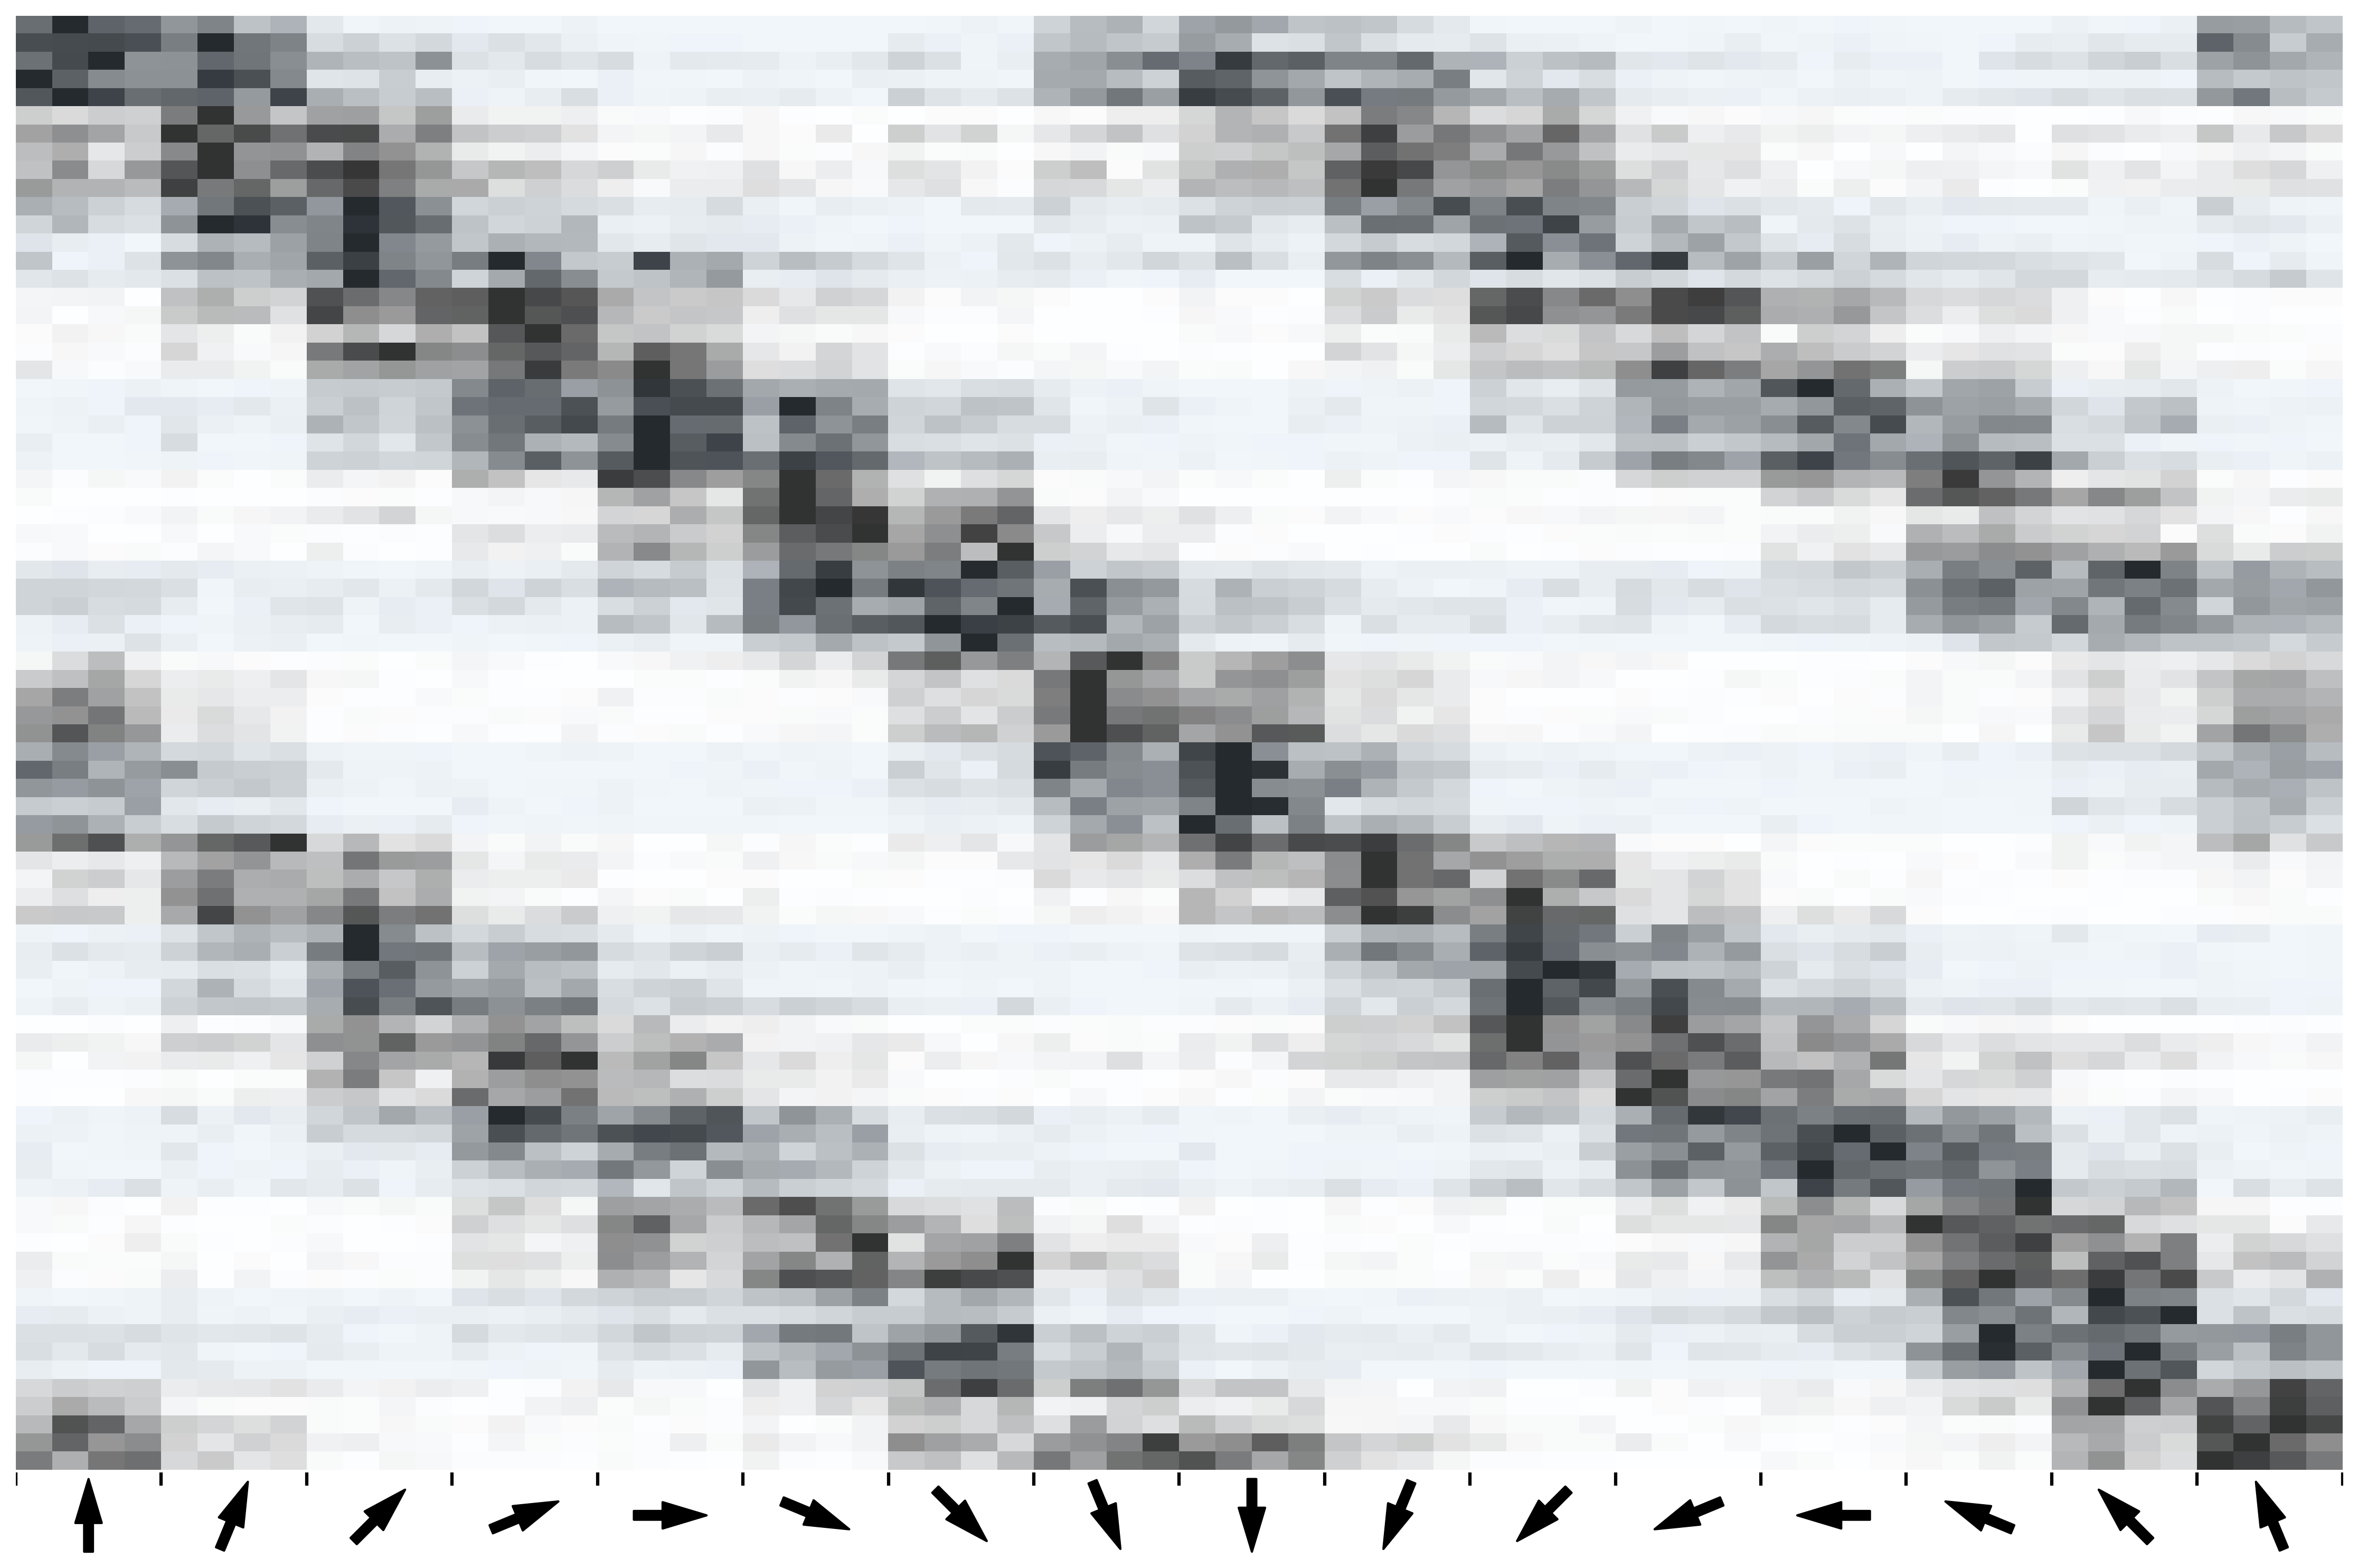

In [3]:
# create an alternating matrix with row counts equal to the key limit
alternating_rows = (np.sin(np.linspace(0, 16 * np.pi, responses.shape[0]) + 1e-16) > 0)
alternating_grid = (alternating_rows[:, None] * np.ones(np.shape(responses)[1])[None, :]) * 0.3

# plot the matrix
dpi = 300
fig, ax = plt.subplots(figsize=(15, 10), dpi=dpi)
ax.imshow(responses, cmap='binary')
ax.imshow(alternating_grid, cmap='Blues', alpha=0.2, vmax=1)
aspect_ratio = .5  # height / width
ax.set_aspect(aspect_ratio)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# plot x ticks
plt.scatter(
    np.linspace(0, responses.shape[1], 17) - .5, 
    np.full(17, responses.shape[0]),
    marker='|',
    c='k',
)

# plot arrows
voffset = 2
arrow_length = 4
arrow_length_point = ax.transData.transform([arrow_length, 0])[0]
arrow_center_x = np.linspace(0, responses.shape[1], 17)[:-1] - .5 + responses.shape[1] / 16 / 2
arrow_center_y = np.full_like(arrow_center_x, responses.shape[0] + voffset)
arrow_radian = (((90 - directions.squeeze()) + 360) % 360) / 180 * np.pi  # clock convention to math convention
arrow_dx, arrow_dy = arrow_length * np.cos(arrow_radian) * aspect_ratio, arrow_length * np.sin(arrow_radian)  # The length of the arrow along x and y direction.
arrow_dy = -arrow_dy  # imshow defaults to an inverted y axis
arrow_base_x = arrow_center_x - arrow_dx/2  # coor of the base of the arrow
arrow_base_y = arrow_center_y - arrow_dy/2  # coor of the base of the arrow
for x, y, dx, dy in zip(arrow_base_x, arrow_base_y, arrow_dx, arrow_dy):
    test = plt.annotate('', xy=(x+dx, y+dy), xytext=(x, y), arrowprops={"color": "black", "headlength": 20})
plt.tight_layout()